# Propuesta de proyecto: Caracterización experimental de algoritmos para planificación de intervalos.
Los principales componentes de este proyecto son:
- Implementar un generador de instancias aleatorias del problema de planificación de intervalos con pesos usando la distribución uniforme. Los parámetros de entrada son el número de intervalos, la longitud mínima y máxima de los intervalos, el valor mínimo y máximo de los pesos, así como el tiempo máximo en que puede iniciar un intervalo.
- Implementar las siguientes soluciones al problema de planificación de intervalos con peso: 
    + Basada en una estrategia greedy.
    + Basada en programación dinámica sin memoización.
    + Basada en programación dinámica usando una estrategia "bottom-up".
- Implementar un programa que grafique:
    + Valor promedio, mínimo y máximo del peso de la solución encontrada en 10 instancias aleatorias en función del tamaño de la entrada. La gráfica tendrá tres curvas, una por cada solución implementada. Usar los siguientes valores. para n = 10, 50 y 100. Ustedes definan los valores para los parámetros restantes.
    + Valor promedio, mínimo y máximo del tiempo de ejecución de las mismas 10 instancias aleatorias del punto anterior  en función del tamaño de la entrada. La gráfica tendrá tres curvas, una por cada solución implementada. Usar los siguientes valores. n = 10, 50 y 100. Ustedes definan los valores para los parámetros restantes.

## Inicialización de las librerías a utilizar.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.interpolate import make_interp_spline
import tkinter as TK
import tkinter.font as font
import time

## Inicialización de parámetros predeterminados.

In [29]:
G = []
P = []
Intervalos = []
IntervalosOrdenados = []
ParametrosGraficaV = []
ParametrosGraficaT = []
NumIns = 1
NumInt = 10
LongitudMin = 30
LongitudMax = 50
PesoMin = 1
PesoMax = 50
TiempoMax = 100
rand = int(time.time())

#Configuraciones iniciales de la interfaz Tkinter
Ventana = TK.Tk()
Ventana.wm_title("Problema de la selección de actividades")
Ventana.geometry("1600x900")
BotonFont = font.Font(family='Helvetica', size=20, weight='bold')
EtiquetaFont = font.Font(family='Helvetica', size=15, weight='bold')

#Cajas de texto
NumInstancias = TK.Entry(Ventana, width=10, borderwidth=5, font = BotonFont)
NumIntervalos = TK.Entry(Ventana, width=10, borderwidth=5, font = BotonFont)
NumInstancias.place(x=600, y=550)
NumIntervalos.place(x=600, y=610)

NumLMin = TK.Entry(Ventana, width=10, borderwidth=5, font = EtiquetaFont)
NumLMax = TK.Entry(Ventana, width=10, borderwidth=5, font = EtiquetaFont)
NumPMin = TK.Entry(Ventana, width=10, borderwidth=5, font = EtiquetaFont)
NumPMax = TK.Entry(Ventana, width=10, borderwidth=5, font = EtiquetaFont)
NumTMax = TK.Entry(Ventana, width=10, borderwidth=5, font = EtiquetaFont)
NumLMin.place(x=10, y=350)
NumLMax.place(x=10, y=450)
NumPMin.place(x=10, y=550)
NumPMax.place(x=10, y=650)
NumTMax.place(x=10, y=750)

#Etiquetas
EtiquetaInstancias = TK.Label(Ventana, text=str(NumIns), width=3, font = BotonFont)
EtiquetaIntervalos = TK.Label(Ventana, text=str(NumInt), width=3, font = BotonFont)
EtiquetaInstancias.place(x=900, y=550)
EtiquetaIntervalos.place(x=900, y=610)

EtiquetaParametros = TK.Label(Ventana, text="Parámetros de entrada", width=20, font = EtiquetaFont)
EtiquetaLMin = TK.Label(Ventana, text="Longitud mínima", width=20, font = EtiquetaFont)
EtiquetaLMax = TK.Label(Ventana, text="Longitud máxima", width=20, font = EtiquetaFont)
EtiquetaPMin = TK.Label(Ventana, text="Peso mínimo", width=20, font = EtiquetaFont)
EtiquetaPMax = TK.Label(Ventana, text="Peso máximo", width=20, font = EtiquetaFont)
EtiquetaTMax = TK.Label(Ventana, text="Tiempo máximo de inicio", width=20, font = EtiquetaFont)
EtiquetaValorLMin = TK.Label(Ventana, text=str(LongitudMin), width=5, font = EtiquetaFont)
EtiquetaValorLMax = TK.Label(Ventana, text=str(LongitudMax), width=5, font = EtiquetaFont)
EtiquetaValorPMin = TK.Label(Ventana, text=str(PesoMin), width=5, font = EtiquetaFont)
EtiquetaValorPMax = TK.Label(Ventana, text=str(PesoMax), width=5, font = EtiquetaFont)
EtiquetaValorTMax = TK.Label(Ventana, text=str(TiempoMax), width=5, font = EtiquetaFont)
EtiquetaParametros.place(x=10, y = 250)
EtiquetaLMin.place(x=10, y=300)
EtiquetaLMax.place(x=10, y=400)
EtiquetaPMin.place(x=10, y=500)
EtiquetaPMax.place(x=10, y=600)
EtiquetaTMax.place(x=10, y=700)
EtiquetaValorLMin.place(x=200, y=350)
EtiquetaValorLMax.place(x=200, y=450)
EtiquetaValorPMin.place(x=200, y=550)
EtiquetaValorPMax.place(x=200, y=650)
EtiquetaValorTMax.place(x=200, y=750)

## Generador de números pseudo-aleatorios utilizando un Generador Lineal Congruencial (*Linear Congruence Generator* - LCG).

In [30]:
def NumeroRandomLCG(min,max):
    global rand
    max += 1
    a = 7**5
    m = (2**31)-1
    rand = (a*rand) % m
    prob = rand/m
    return int(((max-min)*(prob)) + min)

## Generador de intervalos de trabajos con pesos, de acuerdo a los parámetros iniciales.

In [31]:
def GeneradorDeInstancias(n):
    planificacion = []
    for i in range(n):
        start = NumeroRandomLCG(0,TiempoMax)
        end = start + NumeroRandomLCG(LongitudMin,LongitudMax)
        weight = NumeroRandomLCG(PesoMin,PesoMax)
        planificacion.append((start,end,weight))
    return planificacion

## Implementación del ordenamiento por mezcla (*merge sort*), necesario para ordenar los intervalos por tiempo de finalización.

In [32]:
def Mezclar(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    # Se crean dos subarreglos
    L = [0] * (n1)
    R = [0] * (n2)
    # Se copian los elementos a los subarreglos L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
    # Se mezclan los subarreglos en uno solo
    i = 0     # Indice inicial del primer subarreglo
    j = 0     # Indice inicial del primer subarreglo
    k = l     # Indice inicial del subarreglo mezcla
    while i < n1 and j < n2:
        if L[i][1] <= R[j][1]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    # Copiar los elementos restantes de L[] y R[], si es que hay
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
# l es el indice izquierdo y r es el indice derecho
# se crean subarreglos del arreglo original para ser ordenados por la función merge
def OrdenarPorMezcla(arr, l, r):
    if l < r:
        m = l+(r-l)//2
        OrdenarPorMezcla(arr, l, m)
        OrdenarPorMezcla(arr, m+1, r)
        Mezclar(arr, l, m, r)

## Generación de lista de actividades compatibles de cada intervalo (combinaciones de subconjuntos de intervalos que no interfieren entre sí con respecto al tiempo).

In [33]:
def TrabajosCompatibles():
    P = [0]*len(G)
    for i in range(len(G)):
        for j in range(i-1,-1,-1):
            if G[i][0] >= G[j][1]:
                P[i] = j+1
                break
    return P

## Implementación de los algoritmos *greedy*, programación dinámica sin y con memoización para la obtención del subconjunto óptimo.

In [34]:
def AlgoritmoVoraz():
    SolucionVoraz = []
    Peso = 0
    for j in G:
        if len(SolucionVoraz) == 0:
            SolucionVoraz.append(j)
        if SolucionVoraz[-1][1] <= j[0]:
            SolucionVoraz.append(j)
    for elemento in SolucionVoraz:
        Peso += elemento[2]
    return Peso

def PDSinMemo(j):
    if j == -1:
        return 0
    else:
        return max(G[j][2] + PDSinMemo((P[j])-1), PDSinMemo(j-1))

def PDBottomUp():
    M = [0]*(len(G)+1)
    M[1] = G[0][2]
    for j in range(1,len(G)+1):
        M[j] = max(G[j-1][2] + M[P[j-1]], M[j-1])
    #print(M)
    return M[-1]

## Generación de las graficas de intervalos de trabajo.

In [35]:
def GraficarIntervalos(G):
    lines = [[(i[0], j), (i[1], j)] for i, j in zip(G, range(len(G)))]      # i toma los elementos, j toma los indices
    lc = LineCollection(lines, colors="black", linewidths=1)                # Se crea la colección de intervalos, definiendo color y ancho de los lineas (intervalos)
    fig, ax = plt.subplots()                                                # Crea una figura a la que se le agrupan
    ax.add_collection(lc)                                                   # los intervalos
    ax.margins(0.05)
    plt.yticks([], [])
    # Agregando datos del intervalo
    for i, x in enumerate(G):
        #plt.text(x[0]-4, i-0.1, x[0], color="black", fontsize='x-small')     # Imprime el inicio del intervalo
        #plt.text(x[1]+0.5, i-0.1, x[1], color="black", fontsize='x-small')   # Imprime el fin del intervalo
        plt.text(x[0]+(x[1]-x[0])/2, i+0.2, x[2], color="black", fontsize='x-small')  # Imprime los pesos de los intervalos
    # Dibujar el gráfico de los intervalos e imrpimirlos en la consola
    plt.show()

## Generación de las graficas de soluciones de cada algoritmo.

In [36]:
def GraficarSoluciones(Entradas,p_S1,p_S2,p_S3,max_S1,max_S2,max_S3,min_S1,min_S2,min_S3,Titulo,EjeY):
    if Titulo == "Pesos de la solución":
        FigV = plt.figure("Soluciones de pesos promedios")
    else:
        FigV = plt.figure("Tiempos de ejecución promedios")

    ax = FigV.add_subplot(1,1,1)
    x = np.array(Entradas)
    y1 = np.array(p_S1)
    y2 = np.array(p_S2)
    y3 = np.array(p_S3)
    XY1Spline = make_interp_spline(x, y1)
    XY2Spline = make_interp_spline(x, y2)
    XY3Spline = make_interp_spline(x, y3)
    X = np.linspace(x.min(), x.max(), 500)
    Y1 = XY1Spline(X)
    Y2 = XY2Spline(X)
    Y3 = XY3Spline(X)

    plt.plot(X, Y1, color="green")
    plt.plot(X, Y2, color="red")
    plt.plot(X, Y3, color="blue")

    plt.scatter(Entradas, p_S1, color="green")
    plt.scatter(Entradas, max_S1, color="green")
    plt.scatter(Entradas, min_S1, color="green")
    plt.scatter(Entradas, p_S2, color="red")
    plt.scatter(Entradas, max_S2, color="red")    
    plt.scatter(Entradas, min_S2, color="red")
    plt.scatter(Entradas, p_S3, color="blue")
    plt.scatter(Entradas, max_S3, color="blue")
    plt.scatter(Entradas, min_S3, color="blue")

    for i in range(len(Entradas)):
        if Titulo == "Pesos de la solución":
            plt.text(Entradas[i]-1, p_S1[i]-6, p_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]-1, max_S1[i]-6, max_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]-1, min_S1[i]-6, min_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]-1, p_S2[i]-6, p_S2[i], color="red", fontsize='x-small')
            plt.text(Entradas[i]-1, max_S2[i]-6, max_S2[i], color="red", fontsize='x-small')
            plt.text(Entradas[i]-1, min_S2[i]-6, min_S2[i], color="red", fontsize='x-small')
            plt.text(Entradas[i]-1, p_S3[i]+4, p_S3[i], color="blue", fontsize='x-small')
            plt.text(Entradas[i]-1, max_S3[i]+4, max_S3[i], color="blue", fontsize='x-small')
            plt.text(Entradas[i]-1, min_S3[i]+4, min_S3[i], color="blue", fontsize='x-small')
        else:
            plt.text(Entradas[i]+3, p_S1[i]-min_S2[i], p_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]+3, max_S1[i]-min_S2[i], max_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]+3, min_S1[i]-min_S2[i], min_S1[i], color="green", fontsize='x-small')
            plt.text(Entradas[i]-6, p_S2[i], str(p_S2[i])[0:6], color="red", fontsize='x-small')
            plt.text(Entradas[i]-6, max_S2[i], str(max_S2[i])[0:6], color="red", fontsize='x-small')
            plt.text(Entradas[i]-6, min_S2[i], str(min_S2[i])[0:6], color="red", fontsize='x-small')
            plt.text(Entradas[i]-3, p_S3[i], p_S3[i], color="blue", fontsize='x-small')
            plt.text(Entradas[i]-3, max_S3[i], max_S3[i], color="blue", fontsize='x-small')
            plt.text(Entradas[i]-3, min_S3[i], min_S3[i], color="blue", fontsize='x-small')
    plt.title(Titulo)
    plt.ylabel(EjeY)
    plt.xlabel("Número de intervalos")
    plt.legend(["Greedy","PD (Sin memoización)","PD (Bottom up)"], loc="upper left")
    plt.show()

## Visualización de datos

In [37]:
def MostrarValores():
    if len(Intervalos) == 0:
        pass
    else:
        GraficarSoluciones(ParametrosGraficaV[0],ParametrosGraficaV[1],ParametrosGraficaV[2],ParametrosGraficaV[3],
            ParametrosGraficaV[4],ParametrosGraficaV[5],ParametrosGraficaV[6],ParametrosGraficaV[7],
            ParametrosGraficaV[8],ParametrosGraficaV[9],ParametrosGraficaV[10],ParametrosGraficaV[11])

def MostrarTiempos():
    if len(Intervalos) == 0:
        pass
    else:
        GraficarSoluciones(ParametrosGraficaT[0],ParametrosGraficaT[1],ParametrosGraficaT[2],ParametrosGraficaT[3],
            ParametrosGraficaT[4],ParametrosGraficaT[5],ParametrosGraficaT[6],ParametrosGraficaT[7],
            ParametrosGraficaT[8],ParametrosGraficaT[9],ParametrosGraficaT[10],ParametrosGraficaT[11])

def MostrarIntervalos():
    if len(Intervalos) == 0:
        pass
    else:
        if NumInt == 200:
            GraficarIntervalos(Intervalos[NumIns+29])
        elif NumInt == 100:
            GraficarIntervalos(Intervalos[NumIns+19])
        elif NumInt == 50:
            GraficarIntervalos(Intervalos[NumIns+9])
        else:
            GraficarIntervalos(Intervalos[NumIns-1])

def MostrarIntervalosOrdenados():
    if len(IntervalosOrdenados) == 0:
        pass
    else:
        if NumInt == 200:
            GraficarIntervalos(IntervalosOrdenados[NumIns+29])
        elif NumInt == 100:
            GraficarIntervalos(IntervalosOrdenados[NumIns+19])
        elif NumInt == 50:
            GraficarIntervalos(IntervalosOrdenados[NumIns+9])
        else:
            GraficarIntervalos(IntervalosOrdenados[NumIns-1])

## Almacenamiento de datos

In [38]:
def GuardarInstancia():
    global NumIns
    NumIns = NumInstancias.get()
    if NumIns.isdecimal():
        NumIns = int(NumIns)
        if NumIns > 10:
            NumIns = 10
        elif NumIns < 1:
            NumIns = 1
    else:
        NumIns = 1
    EtiquetaInstancias = TK.Label(Ventana, text=str(NumIns), width=3, font = BotonFont)
    NumInstancias.delete(0,"end")
    EtiquetaInstancias.place(x=900, y=550)
    
def GuardarIntervalos():
    global NumInt
    NumInt = NumIntervalos.get()
    if NumInt.isdecimal():
        NumInt = int(NumInt)
        if NumInt >= 200:
            NumInt = 200
        elif NumInt >= 100 and NumInt < 200:
            NumInt = 100
        elif NumInt >= 50 and NumInt < 100:
            NumInt = 50
        else:
            NumInt = 10
    else:
        NumInt = 10
    EtiquetaIntervalos = TK.Label(Ventana, text=str(NumInt), width=3, font = BotonFont)
    NumIntervalos.delete(0,"end")
    EtiquetaIntervalos.place(x=900, y=610)

def GuardarParametros(valor):
    global LongitudMin
    global LongitudMax
    global PesoMin
    global PesoMax
    global TiempoMax
    if valor == 1:
        LongitudMin = NumLMin.get()
        if LongitudMin.isdecimal():
            LongitudMin = int(LongitudMin)
            if LongitudMin < 1:
                LongitudMin = 1
            elif LongitudMin > 100:
                LongitudMin = 100
            if LongitudMin >= LongitudMax - 10:
                LongitudMin = LongitudMax - 10
        else:
            LongitudMin = LongitudMax - 10
        EtiquetaValorLMin = TK.Label(Ventana, text=str(LongitudMin), width=5, font = EtiquetaFont)
        EtiquetaValorLMax= TK.Label(Ventana, text=str(LongitudMax), width=5, font = EtiquetaFont)
        NumLMin.delete(0,"end")
        EtiquetaValorLMin.place(x=200, y=350)
        EtiquetaValorLMax.place(x=200, y=450)
    elif valor == 2:
        LongitudMax = NumLMax.get()
        if LongitudMax.isdecimal():
            LongitudMax = int(LongitudMax)
            if LongitudMax < LongitudMin + 10:
                LongitudMax = LongitudMin + 10
            elif LongitudMax > 500:
                LongitudMax = 500
        else:
            LongitudMax = LongitudMin + 10
        EtiquetaValorLMax= TK.Label(Ventana, text=str(LongitudMax), width=5, font = EtiquetaFont)
        NumLMax.delete(0,"end")
        EtiquetaValorLMax.place(x=200, y=450)
    elif valor == 3:
        PesoMin = NumPMin.get()
        if PesoMin.isdecimal():
            PesoMin = int(PesoMin)
            if PesoMin < 1:
                PesoMin = 1
            elif PesoMin > 100:
                PesoMin = 100
            if PesoMin >= PesoMax - 10:
                PesoMin = PesoMax - 10
        else:
            PesoMin = PesoMax - 10
        EtiquetaValorPMin = TK.Label(Ventana, text=str(PesoMin), width=5, font = EtiquetaFont)
        EtiquetaValorPMax = TK.Label(Ventana, text=str(PesoMax), width=5, font = EtiquetaFont)
        NumPMin.delete(0,"end")
        EtiquetaValorPMin.place(x=200, y=550)
        EtiquetaValorPMax.place(x=200, y=650)
    elif valor == 4:
        PesoMax = NumPMax.get()
        if PesoMax.isdecimal():
            PesoMax = int(PesoMax)
            if PesoMax < PesoMin + 10:
                PesoMax = PesoMin + 10
            elif PesoMax > 1000:
                PesoMax = 1000
        else:
            PesoMax = PesoMin + 10
        EtiquetaValorPMax = TK.Label(Ventana, text=str(PesoMax), width=5, font = EtiquetaFont)
        NumPMax.delete(0,"end")
        EtiquetaValorPMax.place(x=200, y=650)
    else:
        TiempoMax = NumTMax.get()
        if TiempoMax.isdecimal():
            TiempoMax = int(TiempoMax)
            if TiempoMax < 10:
                TiempoMax = 10
            elif TiempoMax > 250:
                TiempoMax = 250
        else:
            TiempoMax = 100
        EtiquetaValorTMax = TK.Label(Ventana, text=str(TiempoMax), width=5, font = EtiquetaFont)
        NumTMax.delete(0,"end")
        EtiquetaValorTMax.place(x=200, y=750)

## Generación de datos

In [39]:
def ObtenerValores():
    global G
    global P
    global Intervalos
    global IntervalosOrdenados
    global ParametrosGraficaV
    global ParametrosGraficaT
    Entradas = [10, 50, 100, 200]
    Instancias = 10
    k = 0
    ValoresPromediosS1 = [0]*len(Entradas)
    ValoresPromediosS2 = [0]*len(Entradas)
    ValoresPromediosS3 = [0]*len(Entradas)
    ValoresMaximosS1 = []
    ValoresMaximosS2 = []
    ValoresMaximosS3 = []
    ValoresMinimosS1 = []
    ValoresMinimosS2 = []
    ValoresMinimosS3 = []
    TiemposPromediosS1 = [0]*len(Entradas)
    TiemposPromediosS2 = [0]*len(Entradas)
    TiemposPromediosS3 = [0]*len(Entradas)
    TiemposMaximosS1 = []
    TiemposMaximosS2 = []
    TiemposMaximosS3 = []
    TiemposMinimosS1 = []
    TiemposMinimosS2 = []
    TiemposMinimosS3 = []
    S1 = []
    S2 = []
    S3 = []
    T1 = []
    T2 = []
    T3 = []
    for j in Entradas:
        for i in range(Instancias):
            G = GeneradorDeInstancias(j)
            Intervalos.append(G.copy())
            OrdenarPorMezcla(G, 0, len(G)-1)
            IntervalosOrdenados.append(G)
            P = TrabajosCompatibles()
            Inicio1 = time.time()
            S1.append(AlgoritmoVoraz())
            Fin1 = time.time()
            S2.append(PDSinMemo(len(G)-1))
            Fin2 = time.time()
            S3.append(PDBottomUp())
            Fin3 = time.time()
            ValoresPromediosS1[k] += S1[-1]
            ValoresPromediosS2[k] += S2[-1]
            ValoresPromediosS3[k] += S3[-1]
            T1.append(Fin1-Inicio1)
            T2.append(Fin2-Fin1)
            T3.append(Fin3-Fin2)
            TiemposPromediosS1[k] += T1[-1]
            TiemposPromediosS2[k] += T2[-1]
            TiemposPromediosS3[k] += T3[-1]

        ValoresPromediosS1[k] = float(ValoresPromediosS1[k])/10
        ValoresPromediosS2[k] = float(ValoresPromediosS2[k])/10
        ValoresPromediosS3[k] = float(ValoresPromediosS3[k])/10
        ValoresMaximosS1.append(max(S1))
        ValoresMaximosS2.append(max(S2))
        ValoresMaximosS3.append(max(S3))
        ValoresMinimosS1.append(min(S1))
        ValoresMinimosS2.append(min(S2))
        ValoresMinimosS3.append(min(S3))

        TiemposPromediosS1[k] = float(TiemposPromediosS1[k])/10
        TiemposPromediosS2[k] = float(TiemposPromediosS2[k])/10
        TiemposPromediosS3[k] = float(TiemposPromediosS3[k])/10
        TiemposMaximosS1.append(max(T1))
        TiemposMaximosS2.append(max(T2))
        TiemposMaximosS3.append(max(T3))
        TiemposMinimosS1.append(min(T1))
        TiemposMinimosS2.append(min(T2))
        TiemposMinimosS3.append(min(T3))
        k += 1
        S1 = []
        S2 = []
        S3 = []
        T1 = []
        T2 = []
        T3 = []

    ParametrosGraficaV = [Entradas,ValoresPromediosS1,ValoresPromediosS2,ValoresPromediosS3,
        ValoresMaximosS1,ValoresMaximosS2,ValoresMaximosS3,ValoresMinimosS1,ValoresMinimosS2,ValoresMinimosS3,
        "Pesos de la solución","Peso"]
    ParametrosGraficaT = [Entradas,TiemposPromediosS1,TiemposPromediosS2,TiemposPromediosS3,
        TiemposMaximosS1,TiemposMaximosS2,TiemposMaximosS3,TiemposMinimosS1,TiemposMinimosS2,TiemposMinimosS3,
        "Tiempo de ejecución","Tiempo (s)"]

## Implementación de la interfaz gráfica utilizando TKinter.

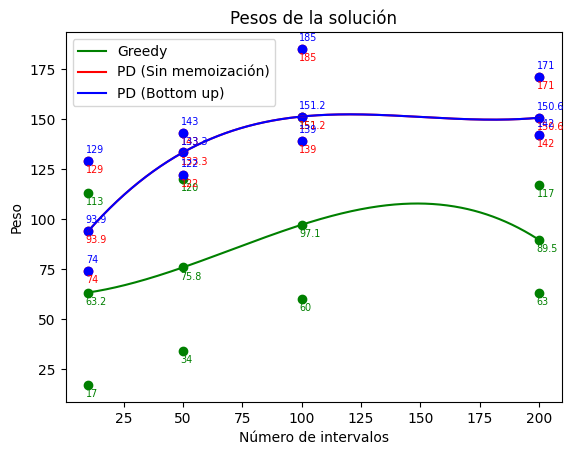

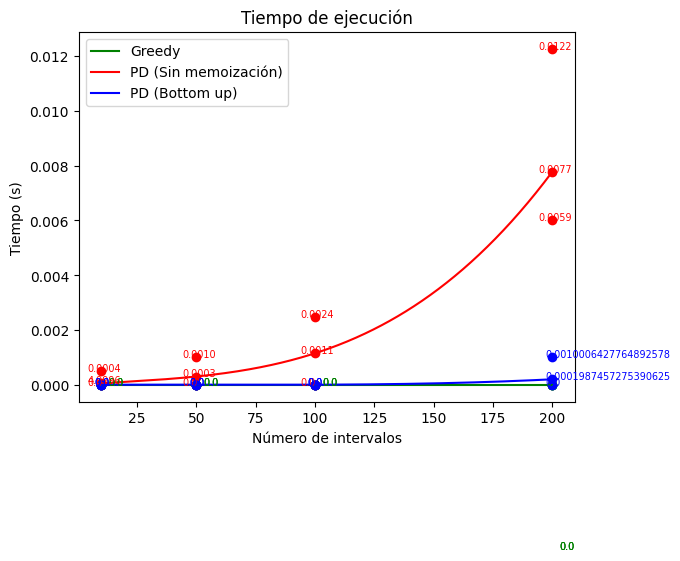

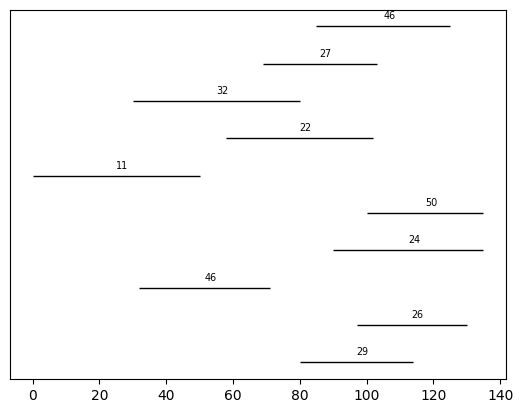

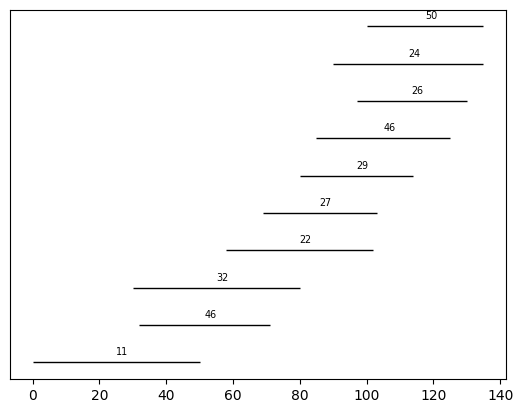

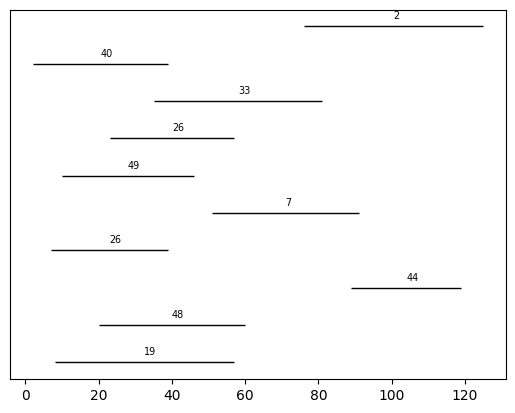

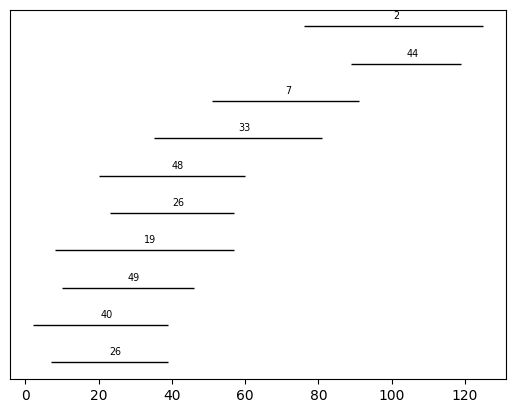

In [40]:
#Botones
BotonGenerar = TK.Button(master=Ventana, text="Generar nuevas instancias", bg="#B2BABB", font = BotonFont, command=ObtenerValores)
BotonGenerar.place(x=565, y=50)
BotonGPesos = TK.Button(master=Ventana, text="Mostrar gráfica de pesos", bg="#B2BABB", font = BotonFont, command=MostrarValores)
BotonGPesos.place(x=577, y=150)
BotonGTiempos = TK.Button(master=Ventana, text="Mostrar gráfica de tiempos", bg="#B2BABB", font = BotonFont, command=MostrarTiempos)
BotonGTiempos.place(x=564, y=250)
BotonIntervalos = TK.Button(master=Ventana, text="Mostrar Intervalos", bg="#B2BABB", font = BotonFont, command=MostrarIntervalos)
BotonIntervalos.place(x=620, y=350)
BotonIntervalosP = TK.Button(master=Ventana, text="Mostrar Intervalos (ordenados)", bg="#B2BABB", font = BotonFont, command=MostrarIntervalosOrdenados)
BotonIntervalosP.place(x=540, y=450)
BotonNumInstancias = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = BotonFont, command=GuardarInstancia)
BotonNumInstancias.place(x=800, y=540)
BotonNumIntervalos = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = BotonFont, command=GuardarIntervalos)
BotonNumIntervalos.place(x=800, y=600)

BotonLMin = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = EtiquetaFont, command=lambda: GuardarParametros(1))
BotonLMin.place(x=150, y=350)
BotonLMax = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = EtiquetaFont, command=lambda: GuardarParametros(2))
BotonLMax.place(x=150, y=450)
BotonPMin = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = EtiquetaFont, command=lambda: GuardarParametros(3))
BotonPMin.place(x=150, y=550)
BotonPMax = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = EtiquetaFont, command=lambda: GuardarParametros(4))
BotonPMax.place(x=150, y=650)
BotonTMax = TK.Button(master=Ventana, text="OK", bg="#B2BABB", font = EtiquetaFont, command=lambda: GuardarParametros(5))
BotonTMax.place(x=150, y=750)

TK.mainloop()